## Read in and get an overview of the data

In [158]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [159]:
#load the dataset
df=pd.read_csv("road-accidents.csv")

In [160]:
df.head()

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...


In [161]:
df1=pd.read_csv('road-accidents.csv', comment = '#', sep = '|')
df1.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [163]:
df1.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

In [164]:
df1.shape

(51, 5)

In [165]:
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

## Create a textual and a graphical summary of the data

In [166]:
df1.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


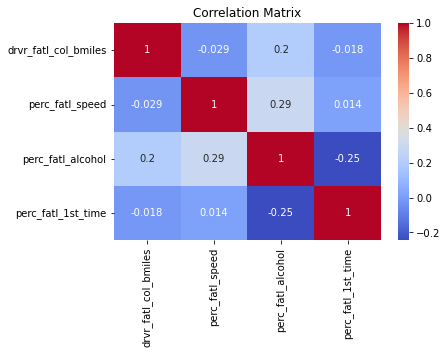

In [167]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

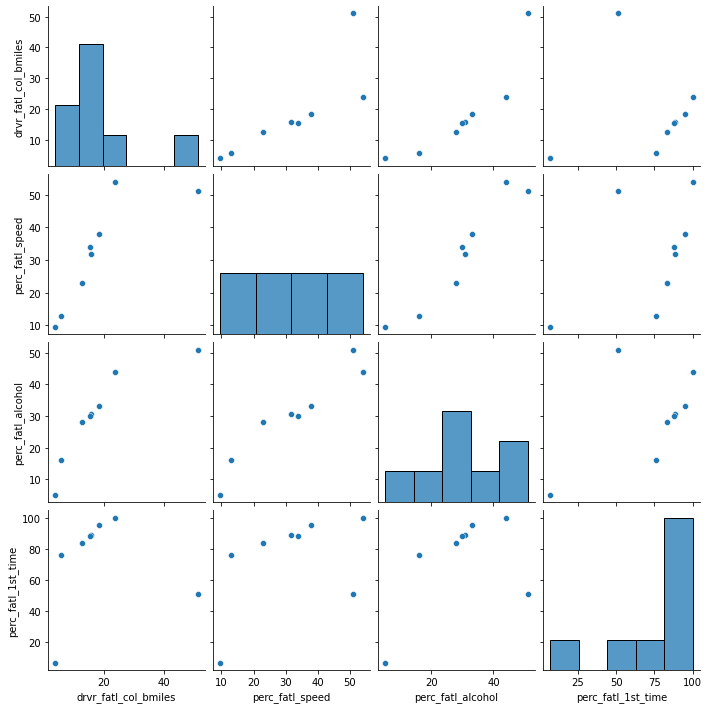

In [168]:
sns.pairplot(df1.describe())

<AxesSubplot:xlabel='drvr_fatl_col_bmiles', ylabel='state'>

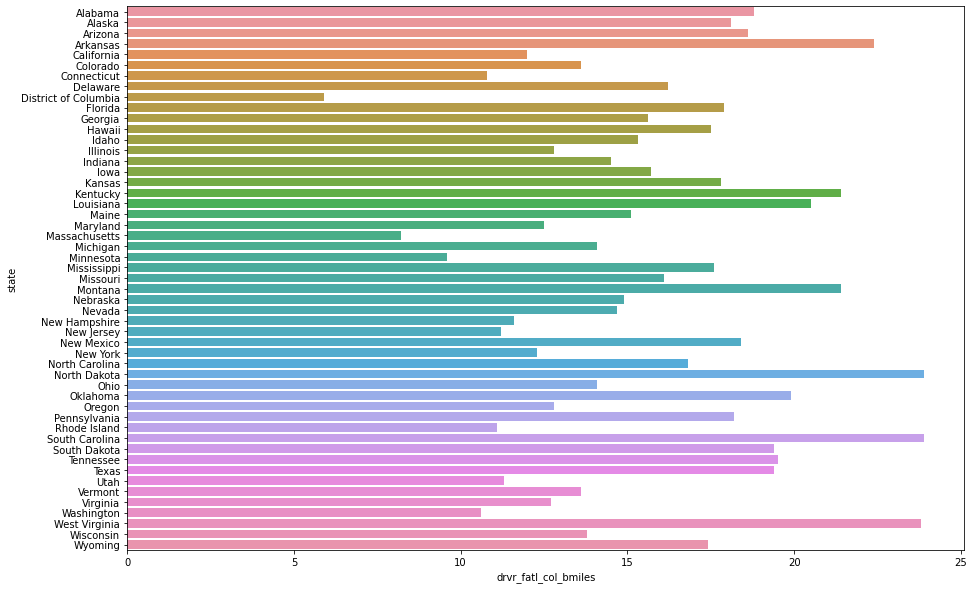

In [169]:
#no of drivers involved in fatal collisions per billion miles
plt.figure(figsize=(15,10))

sns.barplot(x='drvr_fatl_col_bmiles', y='state',data=df1)

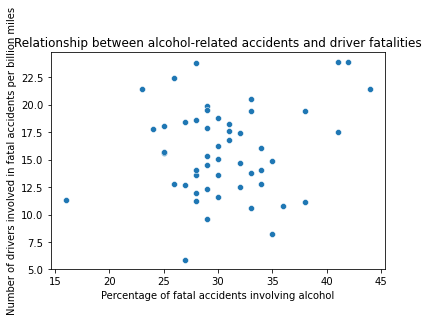

In [170]:
sns.scatterplot(x=df1['perc_fatl_alcohol'], y=df1['drvr_fatl_col_bmiles'])
plt.xlabel('Percentage of fatal accidents involving alcohol')
plt.ylabel('Number of drivers involved in fatal accidents per billion miles')
plt.title('Relationship between alcohol-related accidents and driver fatalities')
plt.show()

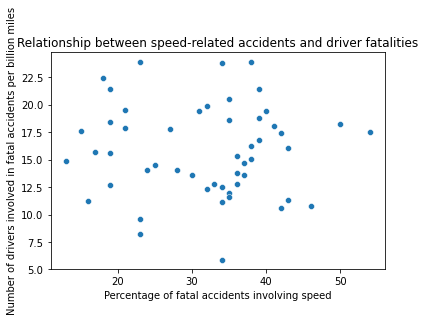

In [171]:
sns.scatterplot(x=df1['perc_fatl_speed'], y=df1['drvr_fatl_col_bmiles'])
plt.xlabel('Percentage of fatal accidents involving speed')
plt.ylabel('Number of drivers involved in fatal accidents per billion miles')
plt.title('Relationship between speed-related accidents and driver fatalities')
plt.show()

## Quantify the association of features and accidents
The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

they are only highly correlated to their own features and very less correlated to other features.

In [172]:
df1.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


## Fit a multivariate linear regression

In [173]:
x=df1[['perc_fatl_1st_time','perc_fatl_speed','perc_fatl_alcohol']]
y=df1['drvr_fatl_col_bmiles'] 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [174]:
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [175]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 17.580811749575172
Coefficients: 
 [-0.01650619 -0.03433368  0.02298113]


In [176]:
y_pred=regr.predict(x_test)
y_pred
r_sq=regr.score(x,y)
r_sq

0.009703741818558154

In [177]:
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.396297495626518


In [178]:
mae = np.mean(np.abs(y_pred - y_test))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.6659414168903925


## Perform PCA on standardized data

In [179]:
#standardising the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)
features_scaled

array([[-1.26611685,  0.76264511, -0.1350496 ],
       [ 0.76536053,  0.97232113, -1.1189824 ],
       [ 1.05557158,  0.34329308, -0.52862272],
       [ 0.91046605, -1.43895304, -0.92219584],
       [ 0.03983289,  0.34329308, -0.52862272],
       [ 0.91046605,  0.5529691 , -0.52862272],
       [-0.9759058 ,  1.49651116,  1.04566976],
       [ 1.49088816,  0.6578071 , -0.1350496 ],
       [ 1.63599369,  0.23845508, -0.72540928],
       [ 0.76536053, -1.12443902, -0.33183616],
       [ 0.620255  , -1.33411503, -1.1189824 ],
       [-0.25037816,  2.33521522,  2.02960256],
       [ 1.34578263,  0.44813109, -0.33183616],
       [ 1.05557158,  0.44813109,  0.65209664],
       [ 0.91046605, -0.70508699, -0.33183616],
       [-0.25037816, -1.54379105, -1.1189824 ],
       [-0.54058922, -0.49541097, -1.31576896],
       [-1.84653896, -1.33411503, -1.51255552],
       [ 1.34578263,  0.34329308,  0.45531008],
       [-0.68569475,  0.6578071 , -0.1350496 ],
       [ 1.49088816,  0.23845508,  0.258

In [180]:
#Perform PCA on standardized data
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(features_scaled)
x_pca


array([[ 0.88463912,  0.46421102,  1.09765186],
       [-0.62529903, -1.22024698,  0.95042366],
       [-0.67169596, -1.02786253,  0.06202125],
       [-1.83954608,  0.23991011, -0.5554213 ],
       [-0.21174283, -0.25666671,  0.53681091],
       [-0.49390467, -1.05414432,  0.24290566],
       [ 1.98805561, -0.22697834,  0.53054572],
       [-0.41984695, -1.56080846, -0.24759157],
       [-1.13099129, -1.40144229, -0.12795702],
       [-1.18444358,  0.14877025, -0.73158452],
       [-1.79251216,  0.39090271, -0.2253797 ],
       [ 2.80996806, -1.31802924, -0.04565428],
       [-0.60664618, -1.31530775, -0.15496303],
       [ 0.2268846 , -1.08935235, -0.70860264],
       [-1.02598376, -0.23430583, -0.57329698],
       [-1.51035032,  1.18838032,  0.06852555],
       [-0.95893975,  0.72533611,  0.90732506],
       [-0.95632936,  2.26156134,  1.2033984 ],
       [-0.10099555, -1.24259045, -0.76292673],
       [ 0.56576691,  0.091754  ,  0.76981483],
       [-0.36316811, -1.28565771, -0.749

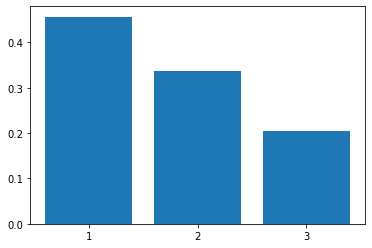

In [181]:
pca=PCA()
pca.fit(features_scaled)
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xticks([1,2,3])
plt.show()
     

## Visualize the first two principal components

In [182]:
pca = PCA(n_components = 2)
pca2 = pca.fit_transform(x_pca)
pca2

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

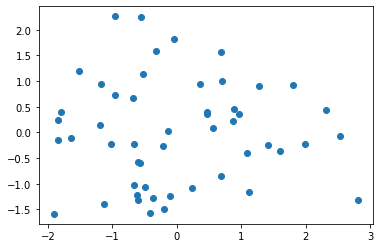

In [183]:
pca_1 = pca2[:,0]
pca_2 = pca2[:,1]

plt.scatter(pca_1, pca_2)

## Find clusters of similar states in the data

C:\Users\HIRLEKHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


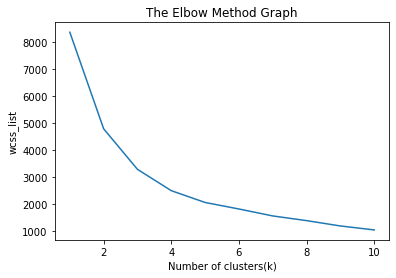

In [184]:
#to find no of clusters
wcss_list= []  
    
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

## KMeans to visualize clusters in the PCA scatter plot

In [185]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

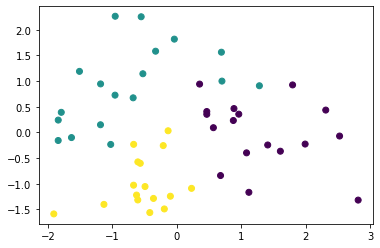

In [186]:
#visualising the scatter plot
plt.scatter(pca_1, pca_2, c=kmeans.labels_)

## Visualize the feature differences between the clusters 

<AxesSubplot:xlabel='percent', ylabel='measurement'>

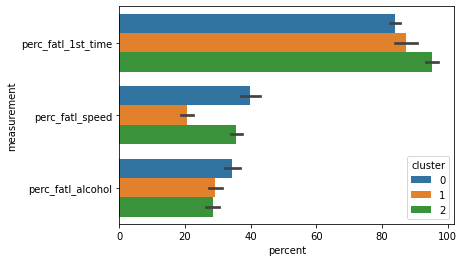

In [187]:
df1['cluster'] = kmeans.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(df1, id_vars='cluster', 
                   var_name='measurement', 
                   value_name='percent', 
                   value_vars=x)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.barplot(x = melt_car['percent'], y = melt_car['measurement'], hue = melt_car['cluster'])

## Compute the number of accidents within each cluster

In [188]:
df2 = pd.read_csv('miles-driven.csv', sep='|')

In [189]:
final_df=df1.merge(df2)
final_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually
0,Alabama,18.8,39,30,80,0,64914
1,Alaska,18.1,41,25,94,2,4593
2,Arizona,18.6,35,28,96,2,59575
3,Arkansas,22.4,18,26,95,1,32953
4,California,12.0,35,28,89,2,320784


In [190]:
final_df['num_drvr_fatl_col'] = (final_df['drvr_fatl_col_bmiles'] * final_df["million_miles_annually"])/1000
final_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,1,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


In [191]:
final_df.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])

,count,mean,sum
cluster,,,
0,17,951.709165,16179.0558
1,18,990.046094,17820.8297
2,16,727.207806,11635.3249


<AxesSubplot:xlabel='cluster', ylabel='num_drvr_fatl_col'>

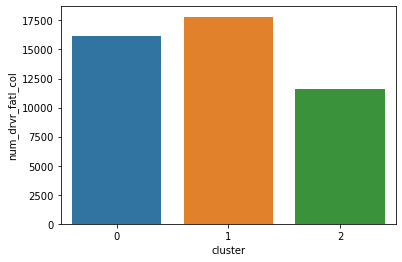

In [192]:
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=final_df, estimator=sum, ci=None)

##  Make a decision when there is no clear right choice


I chose cluster 1  as it has the highest count from overall clusters its due to number of fatal accidents from consuming alcohol
we need to put strict actions into consumption of alcohol while driving

In [193]:
final_df.loc[final_df['cluster']==1]['state']

3          Arkansas
9           Florida
10          Georgia
14          Indiana
15             Iowa
16           Kansas
17         Kentucky
21    Massachusetts
22         Michigan
23        Minnesota
24      Mississippi
27         Nebraska
30       New Jersey
31       New Mexico
34     North Dakota
35             Ohio
42        Tennessee
46         Virginia
Name: state, dtype: object